In [18]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '89269b42-df39-41c9-8f1b-f785d55a9092', 
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['data'])
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.984322e+07,1.984322e+07,False,NaN,1,None,None,None,2025-03-28T14:46:00.000Z,84324.749082,3.092130e+10,17.1948,-1.075399,-3.071268,0.321935,-2.883324,-16.808731,-10.777259,1.673274e+12,61.0516,1.770820e+12,None,2025-03-28T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 14:46:58.625463
1,1027,Ethereum,ETH,ethereum,10081,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206493e+08,1.206493e+08,True,NaN,2,None,None,None,2025-03-28T14:46:00.000Z,1892.019903,1.767954e+10,40.2221,-0.175677,-6.308134,-2.871040,-21.591219,-39.543538,-43.865441,2.282709e+11,8.3288,2.282709e+11,None,2025-03-28T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 14:46:58.625463
2,825,Tether USDt,USDT,tether,121655,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.441823e+11,1.458779e+11,True,NaN,3,None,None,None,2025-03-28T14:46:00.000Z,0.999625,6.815968e+10,16.0801,-0.023564,-0.017333,-0.009114,0.057371,-0.043190,0.139813,1.441283e+11,5.2587,1.458232e+11,None,2025-03-28T14:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-28 14:46:58.625463
3,52,XRP,XRP,xrp,1565,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.820570e+10,9.998630e+10,False,NaN,4,None,None,None,2025-03-28T14:46:00.000Z,2.203248,3.966949e+09,24.5115,-0.365881,-6.254511,-7.335120,-1.334735,-24.293613,1.580723,1.282416e+11,4.6791,2.203248e+11,None,2025-03-28T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 14:46:58.625463
4,1839,BNB,BNB,bnb,2429,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424722e+08,1.424722e+08,False,NaN,5,None,None,None,2025-03-28T14:46:00.000Z,627.018307,1.762876e+09,-23.6722,-0.213342,-1.537356,-1.429206,2.079048,-5.546203,-12.763711,8.933269e+10,3.2594,8.933269e+10,None,2025-03-28T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 14:46:58.625463
5,5426,Solana,SOL,solana,862,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.115789e+08,5.972382e+08,True,NaN,6,None,None,None,2025-03-28T14:45:00.000Z,130.120659,3.463149e+09,11.9521,-0.810212,-6.290066,2.604241,-4.938374,-44.411055,-31.063279,6.656698e+10,2.4297,7.771303e+10,None,2025-03-28T14:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 14:46:58.625463
6,3408,USDC,USDC,usd-coin,26631,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.030132e+10,6.030132e+10,False,NaN,7,None,None,None,2025-03-28T14:46:00.000Z,1.000058,1.105452e+10,8.9816,-0.016175,0.009951,0.011046,0.018078,-0.003995,0.010891,6.030479e+10,2.1980,6.030479e+10,None,2025-03-28T14:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-28 14:46:58.625463
7,74,Dogecoin,DOGE,dogecoin,1188,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.486173e+11,1.486173e+11,True,NaN,8,None,None,None,2025-03-28T14:46:00.000Z,0.180814,1.440222e+09,-7.3434,-0.013696,-6.985486,8.864233,-11.983619,-44.226333,-43.165773,2.687206e+10,0.9805,2.687206e+10,None,2025-03-28T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 14:46:58.625463
8,2010,Cardano,ADA,cardano,1491,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, sma

In [25]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '89269b42-df39-41c9-8f1b-f785d55a9092',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\HP\Desktop\API Script\API.csv'):
        df.to_csv(r'C:\Users\HP\Desktop\API Script\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\HP\Desktop\API Script\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [29]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [31]:
df72 = pd.read_csv(r'C:\Users\HP\Desktop\API Script\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.984323e+07,1.984323e+07,False,NaN,1,NaN,NaN,NaN,2025-03-28T16:35:00.000Z,83908.378020,3.200113e+10,18.7922,-0.474382,-3.544519,-0.040695,-3.374781,-16.370101,-11.234868,1.665014e+12,61.0132,1.762076e+12,NaN,2025-03-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:36:07.508806
1,1,1027,Ethereum,ETH,ethereum,10081,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206493e+08,1.206493e+08,True,NaN,2,NaN,NaN,NaN,2025-03-28T16:35:00.000Z,1873.813824,1.795108e+10,41.7156,-0.478891,-6.700612,-4.358214,-22.008864,-39.638546,-44.495619,2.260743e+11,8.2843,2.260743e+11,NaN,2025-03-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:36:07.508806
2,2,825,Tether USDt,USDT,tether,121660,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'wav...",NaN,1.441823e+11,1.458779e+11,True,NaN,3,NaN,NaN,NaN,2025-03-28T16:34:00.000Z,0.999405,6.898082e+10,16.8031,-0.013171,-0.050281,-0.035506,0.063736,-0.043279,0.114988,1.440966e+11,5.2803,1.457911e+11,NaN,2025-03-28T16:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-28 16:36:07.508806
3,3,52,XRP,XRP,xrp,1565,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.820570e+10,9.998630e+10,False,NaN,4,NaN,NaN,NaN,2025-03-28T16:35:00.000Z,2.181913,4.037705e+09,26.7606,-0.394489,-6.863991,-8.531246,-3.461006,-26.770696,0.139057,1.269998e+11,4.6538,2.181913e+11,NaN,2025-03-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:36:07.508806
4,4,1839,BNB,BNB,bnb,2429,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424722e+08,1.424722e+08,False,NaN,5,NaN,NaN,NaN,2025-03-28T16:35:00.000Z,623.775853,1.724701e+09,-26.5298,-0.530094,-2.136024,-1.639132,0.574016,-6.189048,-13.868229,8.887072e+10,3.2566,8.887072e+10,NaN,2025-03-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:36:07.508806
5,5,5426,Solana,SOL,solana,862,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.115788e+08,5.972382e+08,True,NaN,6,NaN,NaN,NaN,2025-03-28T16:35:00.000Z,129.833661,3.472970e+09,15.5929,-0.005566,-6.005420,3.054426,-6.105360,-44.208554,-31.958166,6.642015e+10,2.4337,7.754162e+10,NaN,2025-03-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:36:07.508806
6,6,3408,USDC,USDC,usd-coin,26632,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.030586e+10,6.030586e+10,False,NaN,7,NaN,NaN,NaN,2025-03-28T16:34:00.000Z,1.000026,1.116857e+10,10.9438,0.002235,0.003418,-0.020751,0.015301,-0.002004,0.000706,6.030740e+10,2.2098,6.030740e+10,NaN,2025-03-28T16:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-28 16:36:07.508806
7,7,74,Dogecoin,DOGE,dogecoin,1188,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.486182e+11,1.486182e+11,True,NaN,8,NaN,NaN,NaN,2025-03-28T16:35:00.000Z,0.179905,1.427230e+09,-4.9973,-0.481784,-6.093551,7.943411,-13.342622,-45.073280,-43.820178,2.673712e+10,0.9798,2.673712e+10,NaN,2025-03-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:36:07.508806
8,8,2010,Cardano,ADA,cardano,1491,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'researc

In [33]:
# One thing I noticed was the scientific notation.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [35]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19843278.00000,19843278.00000,False,NaN,1,None,None,None,2025-03-28T16:48:00.000Z,83849.71993,32179687705.65838,19.66360,-0.56671,-3.63667,-0.14647,-3.57638,-16.24430,-11.37945,1663853302823.29175,61.04870,1760844118561.91992,None,2025-03-28T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:49:02.202354
1,1027,Ethereum,ETH,ethereum,10081,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120649306.81429,120649306.81429,True,NaN,2,None,None,None,2025-03-28T16:48:00.000Z,1871.47450,18015433313.66303,42.27050,-0.49627,-6.79817,-4.64672,-21.85089,-39.61105,-44.50997,225792100575.02457,8.28460,225792100575.01999,None,2025-03-28T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:49:02.202354
2,825,Tether USDt,USDT,tether,121661,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,144182349120.78696,145877857636.93381,True,NaN,3,None,None,None,2025-03-28T16:47:00.000Z,0.99935,68970808246.76784,16.52620,-0.02260,-0.06351,-0.02095,0.05872,-0.03805,0.11878,144088124022.56265,5.28440,145782524501.16000,None,2025-03-28T16:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-28 16:49:02.202354
3,52,XRP,XRP,xrp,1565,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58205697378.00000,99986304107.00000,False,NaN,4,None,None,None,2025-03-28T16:48:00.000Z,2.16974,4066749064.66614,27.87950,-0.87422,-7.59953,-9.03838,-3.83014,-26.31553,-0.57308,126291300845.51161,4.63380,216974122009.64999,None,2025-03-28T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:49:02.202354
4,1839,BNB,BNB,bnb,2429,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142472205.92000,142472205.92000,False,NaN,5,None,None,None,2025-03-28T16:48:00.000Z,623.33731,1725999235.48398,-26.45300,-0.54678,-2.17136,-1.92539,0.74890,-6.19484,-13.99202,88808242054.86935,3.25850,88808242054.87000,None,2025-03-28T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:49:02.202354
5,5426,Solana,SOL,solana,862,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,511578808.30887,597238143.18613,True,NaN,6,None,None,None,2025-03-28T16:48:00.000Z,129.55986,3473978360.60991,15.98430,-0.33912,-6.37940,2.84628,-5.70624,-43.61874,-32.20847,66280078883.70328,2.43110,77378090334.88000,None,2025-03-28T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-28 16:49:02.202354
6,3408,USDC,USDC,usd-coin,26633,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60310573671.50735,60310573671.50735,False,NaN,7,None,None,None,2025-03-28T16:47:00.000Z,0.99986,11103837214.14069,9.64980,-0.00598,-0.01348,-0.00536,-0.02956,0.00500,-0.00831,60302222580.73376,2.21180,60302222580.73000,None,2025-03-28T16:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-28 16:49:02.202354
7,74,Dogecoin,DOGE,dogecoin,1188,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148618476383.70523,148618476383.70523,True,NaN,8,None,None,None,2025-03-28T16:48:00.000Z,0.17977,1425251610.30720,-5.04680,-0.29957,-6.16044,7.74548,-12.85044,-44.50566,-43.92641,26717425627.48582,0.98030,26717425627.490

In [48]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.56671,-3.63667,-0.14647,-3.57638,-16.24430,-11.37945
Ethereum,-0.49627,-6.79817,-4.64672,-21.85089,-39.61105,-44.50997
Tether USDt,-0.02260,-0.06351,-0.02095,0.05872,-0.03805,0.11878
XRP,-0.87422,-7.59953,-9.03838,-3.83014,-26.31553,-0.57308
BNB,-0.54678,-2.17136,-1.92539,0.74890,-6.19484,-13.99202
Solana,-0.33912,-6.37940,2.84628,-5.70624,-43.61874,-32.20847
USDC,-0.00598,-0.01348,-0.00536,-0.02956,0.00500,-0.00831
Dogecoin,-0.29957,-6.16044,7.74548,-12.85044,-44.50566,-43.92641
Cardano,-0.65742,-5.42190,-1.67229,3.66945,-23.69838,-20.74639


In [50]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.56671
              quote.USD.percent_change_24h    -3.63667
              quote.USD.percent_change_7d     -0.14647
              quote.USD.percent_change_30d    -3.57638
              quote.USD.percent_change_60d   -16.24430
              quote.USD.percent_change_90d   -11.37945
Ethereum      quote.USD.percent_change_1h     -0.49627
              quote.USD.percent_change_24h    -6.79817
              quote.USD.percent_change_7d     -4.64672
              quote.USD.percent_change_30d   -21.85089
              quote.USD.percent_change_60d   -39.61105
              quote.USD.percent_change_90d   -44.50997
Tether USDt   quote.USD.percent_change_1h     -0.02260
              quote.USD.percent_change_24h    -0.06351
              quote.USD.percent_change_7d     -0.02095
              quote.USD.percent_change_30d     0.05872
              quote.USD.percent_change_60d    -0.03805
              quote.US

In [52]:
type(df4)

pandas.core.series.Series

In [54]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.56671
             quote.USD.percent_change_24h  -3.63667
             quote.USD.percent_change_7d   -0.14647
             quote.USD.percent_change_30d  -3.57638
             quote.USD.percent_change_60d -16.24430
             quote.USD.percent_change_90d -11.37945
Ethereum     quote.USD.percent_change_1h   -0.49627
             quote.USD.percent_change_24h  -6.79817
             quote.USD.percent_change_7d   -4.64672
             quote.USD.percent_change_30d -21.85089
             quote.USD.percent_change_60d -39.61105
             quote.USD.percent_change_90d -44.50997
Tether USDt  quote.USD.percent_change_1h   -0.02260
             quote.USD.percent_change_24h  -0.06351
             quote.USD.percent_change_7d   -0.02095
             quote.USD.percent_change_30d   0.05872
             quote.USD.percent_change_60d  -0.03805
             quote.USD.percent_change_90d   0.11878
XRP          quote.USD.percent_change_1h   -0.87422
             quote.USD.percent_change_24h  -7.59953
             quote.USD.percent_change_7d   -9.03838
             quote.USD.percent_change_30d  -3.83014
             quote.USD.percent_change_60d -26.31553
             quote.USD.percent_change_90d  -0.57308
BNB          quote.USD.percent_change_1h   -0.54678
             quote.USD.percent_change_24h  -2.17136
             quote.USD.percent_change_7d   -1.92539
             quote.USD.percent_change_30d   0.74890
             quote.USD.percent_change_60d  -6.19484
             quote.USD.percent_change_90d -13.99202
Solana       quote.USD.percent_change_1h   -0.33912
             quote.USD.percent_change_24h  -6.37940
             quote.USD.percent_change_7d    2.84628
             quote.USD.percent_change_30d  -5.70624
             quote.USD.percent_change_60d -43.61874
             quote.USD.percent_change_90d -32.20847
USDC         quote.USD.percent_change_1h   -0.00598
             quote.USD.percent_change_24h  -0.01348
             quote.USD.percent_change_7d   -0.00536
             quote.USD.percent_change_30d  -0.02956
             quote.USD.percent_change_60d   0.00500
             quote.USD.percent_change_90d  -0.00831
Dogecoin     quote.USD.percent_change_1h   -0.29957
             quote.USD.percent_change_24h  -6.16044
             quote.USD.percent_change_7d    7.74548
             quote.USD.percent_change_30d -12.85044
             quote.USD.percent_change_60d -44.50566
             quote.USD.percent_change_90d -43.92641
Cardano      quote.USD.percent_change_1h   -0.65742
             quote.USD.percent_change_24h  -5.42190
             quote.USD.percent_change_7d   -1.67229
             quote.USD.percent_change_30d   3.66945
             quote.USD.percent_change_60d -23.69838
             quote.USD.percent_change_90d -20.74639
TRON         quote.USD.percent_change_1h   -0.08119
             quote.USD.percent_change_24h  -0.82576
             quote.USD.percent_change_7d   -1.60733
             quote.USD.percent_change_30d   1.78565
             quote.USD.percent_change_60d  -4.79595
             quote.USD.percent_change_90d  -9.69256
Toncoin      quote.USD.percent_change_1h   -2.10918
             quote.USD.percent_change_24h  -1.70890
             quote.USD.percent_change_7d    8.59374
             quote.USD.percent_change_30d   9.22956
             quote.USD.percent_change_60d -21.30014
             quote.USD.percent_change_90d -33.36952
Chainlink    quote.USD.percent_change_1h   -1.00186
             quote.USD.percent_change_24h  -9.00838
             quote.USD.percent_change_7d    0.91153
             quote.USD.percent_change_30d  -8.59776
             quote.USD.percent_change_60d -40.16655
             quote.USD.percent_change_90d -34.58290
UNUS SED LEO quote.USD.percent_change_1h   -0.36066
             quote.USD.percent_change_24h  -0.90474
             quote.USD.percent_change_7d   -0.68401
             quote.USD.percent_change_30d

In [56]:
df5.count()

values    90
dtype: int64

In [58]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,-0.56671
1,-3.63667
2,-0.14647
3,-3.57638
4,-16.24430
5,-11.37945
6,-0.49627
7,-6.79817
8,-4.64672
9,-21.85089


In [62]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.56671
1,Bitcoin,quote.USD.percent_change_24h,-3.63667
2,Bitcoin,quote.USD.percent_change_7d,-0.14647
3,Bitcoin,quote.USD.percent_change_30d,-3.57638
4,Bitcoin,quote.USD.percent_change_60d,-16.24430
5,Bitcoin,quote.USD.percent_change_90d,-11.37945
6,Ethereum,quote.USD.percent_change_1h,-0.49627
7,Ethereum,quote.USD.percent_change_24h,-6.79817
8,Ethereum,quote.USD.percent_change_7d,-4.64672
9,Ethereum,quote.USD.percent_change_30d,-21.85089


In [74]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.56671
1,Bitcoin,quote.USD.percent_change_24h,-3.63667
2,Bitcoin,quote.USD.percent_change_7d,-0.14647
3,Bitcoin,quote.USD.percent_change_30d,-3.57638
4,Bitcoin,quote.USD.percent_change_60d,-16.24430
5,Bitcoin,quote.USD.percent_change_90d,-11.37945
6,Ethereum,quote.USD.percent_change_1h,-0.49627
7,Ethereum,quote.USD.percent_change_24h,-6.79817
8,Ethereum,quote.USD.percent_change_7d,-4.64672
9,Ethereum,quote.USD.percent_change_30d,-21.85089


In [96]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.56671
1,Bitcoin,24h,-3.63667
2,Bitcoin,7d,-0.14647
3,Bitcoin,30d,-3.57638
4,Bitcoin,60d,-16.24430
5,Bitcoin,90d,-11.37945
6,Ethereum,1h,-0.49627
7,Ethereum,24h,-6.79817
8,Ethereum,7d,-4.64672
9,Ethereum,30d,-21.85089


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

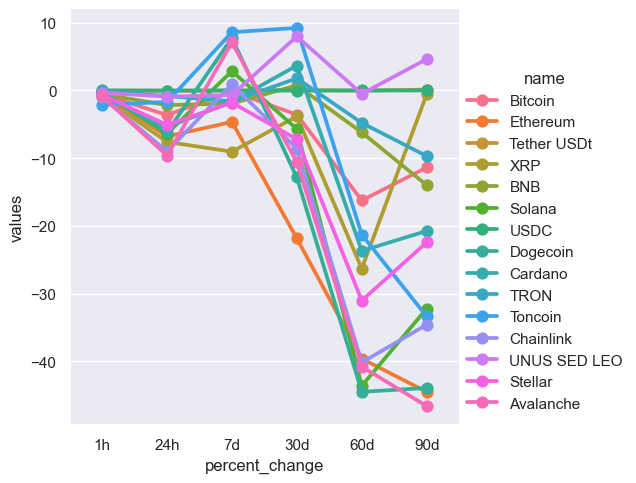

In [98]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [112]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,83908.37802,2025-03-28 16:36:07.508806
15,Bitcoin,83814.00405,2025-03-28 16:46:59.287582
30,Bitcoin,83847.05271,2025-03-28 16:48:00.868356
45,Bitcoin,83849.71993,2025-03-28 16:49:02.202354


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

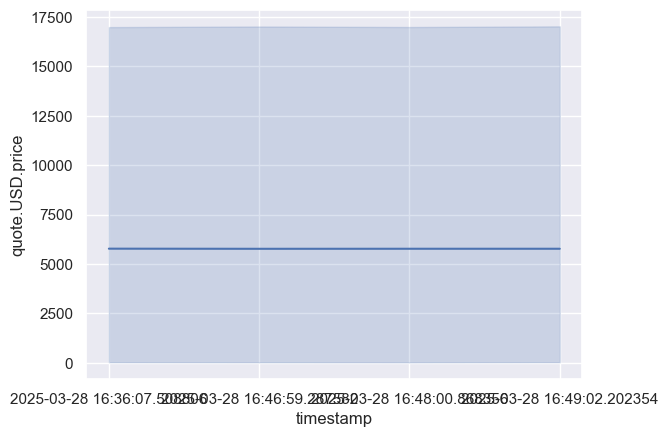

In [110]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df72)